In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount = True)

Mounted at /content/drive/


In [ ]:
# !pip install jiwer
import os
import glob
import pandas as pd
import os
from jiwer import wer,cer
import seaborn as sns
import matplotlib.pyplot as plt

# TF-IDF Analysis

In [ ]:
test_df = pd.read_excel('/content/drive/MyDrive/local_speech/others/IUT_bhasha_bichitra/orig_iut_folds/fix_dataset/final/test/test.xlsx')
test_df

,file_name,External_ID,district,transcriptions,Split,annotator
0,test_barishal (1).wav,rec_21_audio_36.wav,barishal,তিন গাছ তিন গাছ ছয় গাছ দেবে। তুই আয় এই জাগা <>...,Test,nahar2709marzan@gmail.com
1,test_barishal (10).wav,rec_21_audio_45.wav,barishal,গরম লাগে <> কী আছে? কই দেহি। ও পড়বে হোনেন না? ...,Test,nahar2709marzan@gmail.com
2,test_barishal (100).wav,rec_24_audio_10.wav,barishal,চেড়তে চেড়তে আগা বাইরাইয়া যায়। গত বছছর যহন এতো ...,Test,nahar2709marzan@gmail.com
3,test_barishal (101).wav,rec_24_audio_11.wav,barishal,"ওরে আর, ওয়া তো যেকালে পারছো হেইকালে গাছে ওটছো ...",Test,nahar2709marzan@gmail.com
4,test_barishal (102).wav,rec_24_audio_12.wav,barishal,"মোর এট্টা ইসাব, কী? চা আর খামু না অনেক খাইছি। ...",Test,nahar2709marzan@gmail.com
...,...,...,...,...,...,...
1677,test_tangail (95).wav,rec_39_audio_97.wav,tangail,সো ছবিটা আসলে দেখলে মানে ভাল্লাগবো অনেক। তারপর...,Test,zubaer71.bd@gmail.com
1678,test_tangail (96).wav,rec_39_audio_98.wav,tangail,পরে ইদানীং আমার কেমনে জানি মনে অইলো যে এই ছবিড...,Test,zubaer71.bd@gmail.com
1679,test_tangail (97).wav,rec_39_audio_99.wav,tangail,বলিউডের অন্যতম এক প্রভাবশালী ডিরেক্টর সঞ্জয় লী...,Test,zubaer71.bd@gmail.com
1680,test_tangail (98).wav,rec_39_audio_100.wav,tangail,<> মুটামুটি এই চারজন বাদে আর কেউ নেই। আর এই ছব...,Test,zubaer71.bd@gmail.com


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


bangla_stopwords = [
    'অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি',
    'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার',
    'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি',
    'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি',
    'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত',
    'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল',
    'এস', 'এতে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা',
    'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন',
    'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে',
    'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে',
    'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই',
    'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও', 'কোনো', 'ক্ষেত্রে', 'কয়েক', 'খুব', 'গিয়ে', 'গিয়েছে',
    'গিয়ে', 'গুলি', 'গেছে', 'গেল', 'গেলে', 'গোটা', 'চলে', 'চান', 'চায়', 'চার', 'চালু', 'চেয়ে',
    'চেষ্টা', 'ছাড়া', 'ছাড়াও', 'ছিল', 'ছিলেন', 'জন', 'জনকে', 'জনের', 'জন্য', 'জন্যও', 'জে',
    'জানতে', 'জানা', 'জানানো', 'জানায়', 'জানিয়ে', 'জানিয়েছে', 'জে', 'টি', 'ঠিক', 'তখন', 'তত',
    'তথা', 'তবু', 'তবে', 'তা', 'তাঁকে', 'তাঁদের', 'তাঁর', 'তাঁরা', 'তাঁাহারা', 'তাই', 'তাও', 'তাকে',
    'তাতে', 'তাদের', 'তার', 'তারপর', 'তারা', 'তারৈ', 'তাহলে', 'তাহা', 'তাহাতে', 'তাহার', 'তিনঐ',
    'তিনি', 'তিনিও', 'তুমি', 'তুলে', 'তেমন', 'তো', 'তোমার', 'থাকবে', 'থাকবেন', 'থাকা', 'থাকায়',
    'থাকে', 'থাকেন', 'থেকে', 'থেকেই', 'থেকেও', 'দিকে', 'দিতে', 'দিন', 'দিয়ে', 'দিয়েছে', 'দিয়েছেন',
    'দিলেন', 'দু', 'দুই', 'দুটি', 'দুটো', 'দেওয়া', 'দেওয়ার', 'দেওয়া', 'দেখতে', 'দেখা', 'দেখে',
    'দেন', 'দেয়', 'দ্বারা', 'ধরা', 'ধরে', 'ধামার', 'নতুন', 'নয়', 'না', 'নাই', 'নাকি', 'নাগাদ',
    'নানা', 'নিজে', 'নিজেই', 'নিজেদের', 'নিজের', 'নিতে', 'নিয়ে', 'নিয়ে', 'নেই', 'নেওয়া', 'নেওয়ার',
    'নেওয়া', 'নয়', 'পক্ষে', 'পর', 'পরে', 'পরেই', 'পরেও', 'পর্যন্ত', 'পাওয়া', 'পাচ', 'পারি',
    'পারে', 'পারেন', 'পি', 'পেয়ে', 'পেয়্র্', 'প্রতি', 'প্রথম', 'প্রভৃতি', 'প্রযন্ত', 'প্রায়',
    'প্রায়', 'ফলে', 'ফিরে', 'ফের', 'বক্তব্য', 'বদলে', 'বন', 'বরং', 'বলতে', 'বলল', 'বললেন', 'বলা',
    'বলে', 'বলেছেন', 'বলেন', 'বসে', 'বহু', 'বা', 'বাদে', 'বার', 'বি', 'বিনা', 'বিভিন্ন', 'বিশেষ',
    'বিষয়টি', 'বেশ', 'বেশি', 'ব্যবহার', 'ব্যাপারে', 'ভাবে', 'ভাবেই', 'মতো', 'মতোই', 'মধ্যে',
    'মধ্যে', 'মধ্যেই', 'মধ্যেও', 'মনে', 'মাত্র', 'মাধ্যমে', 'মোট', 'মোটেই', 'যখন', 'যত',
    'যতটা', 'যথেষ্ট', 'যদি', 'যদিও', 'যা', 'যাঁর', 'যাঁরা', 'যাওয়া', 'যাওয়ার', 'যাওয়া',
    'যাকে', 'যাচ্ছে', 'যাতে', 'যাদের', 'যান', 'যাবে', 'যায়', 'যার', 'যারা', 'যিনি', 'যে',
    'যেখানে', 'যেতে', 'যেন', 'যেমন', 'র', 'রকম', 'রয়েছে', 'রাখা', 'রেখে', 'লক্ষ', 'শুধু',
    'শুরু', 'সঙ্গে', 'সঙ্গেও', 'সব', 'সবার', 'সমস্ত', 'সম্প্রতি', 'সহ', 'সহিত', 'সাধারণ', 'সামনে',
    'সি', 'সুতরাং', 'সে', 'সেই', 'সেখান', 'সেখানে', 'সেটা', 'সেটাই', 'সেটাও', 'সেটি', 'স্পষ্ট',
    'স্বয়ং', 'হইতে', 'হইবে', 'হইয়া', 'হওয়া', 'হওয়ায়', 'হওয়ার', 'হচ্ছে', 'হত', 'হতে',
    'হতেই', 'হন', 'হবে', 'হবেন', 'হয়', 'হয়তো', 'হয়নি', 'হয়ে', 'হয়েই', 'হয়েছিল', 'হয়েছে',
    'হয়েছেন', 'হল', 'হলে', 'হলেই', 'হলেও', 'হলো', 'হাজার', 'হিসাবে', 'হৈলে', 'হোক', 'হয়'
]

## Per sample tf-idf
# transcriptions = test_df['transcriptions'].astype(str)

# vectorizer = TfidfVectorizer(max_features=1000, stop_words=bangla_stopwords)
# tfidf_matrix = vectorizer.fit_transform(transcriptions)

# tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# tfidf_df
# Extract districts and transcriptions


## Per District tf-idf
# Extract districts and transcriptions
district_groups = test_df.groupby('district')['transcriptions'].apply(lambda x: ' '.join(x)).reset_index()

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000, stop_words=bangla_stopwords)

# Fit TF-IDF to district-wise concatenated transcriptions
tfidf_matrix = vectorizer.fit_transform(district_groups['transcriptions'])

# Convert TF-IDF matrix to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out(), index=district_groups['district'])

tfidf_df

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['অথব', 'অন', 'অবধ', 'অবশ', 'অর', 'আগ', 'আছ', 'আদ', 'আপন', 'আব', 'আম', 'আমর', 'ইত', 'ইহ', 'উই', 'উক', 'উচ', 'উত', 'উন', 'এক', 'একট', 'একব', 'এখ', 'এট', 'এতট', 'এদ', 'এমনক', 'ওক', 'ওখ', 'ওদ', 'ওয', 'ওয়', 'কট', 'কব', 'কমন', 'কয', 'কর', 'করছ', 'করত', 'করব', 'করল', 'কয়', 'খত', 'চল', 'জনক', 'তথ', 'তব', 'তর', 'ধর', 'নঐ', 'নও', 'নত', 'নয', 'পক', 'পষ', 'ফল', 'বক', 'বদল', 'বয', 'বর', 'বল', 'বলত', 'বস', 'বহ', 'মত', 'মধ', 'মন', 'যও', 'যতট', 'যথ', 'যদ', 'যন', 'যবহ', 'যভ', 'যম', 'রও', 'রণ', 'রত', 'রথম', 'রপর', 'রভ', 'রয', 'রযন', 'লক', 'ষয', 'সঙ', 'সম', 'সমস', 'হইত', 'হইব', 'হইয', 'হওয', 'হচ', 'হব', 'হয'] not in stop_words.
  warnings.warn(


,অই,অইগ,অইগল,অইছ,অইত,অইন,অইব,অইর,অইল,অইলদ,...,য়গ,য়ত,য়দ,য়ন,য়ব,য়ম,য়র,য়ল,য়লজ,য়স
district,,,,,,,,,,,,,,,,,,,,,
barishal,0.000000,0.000000,0.000000,0.070549,0.031413,0.000000,0.092256,0.000000,0.080776,0.000000,...,0.008187,0.000000,0.000000,0.000000,0.000000,0.000000,0.026925,0.000000,0.000000,0.000000
chittagong,0.088958,0.005162,0.000000,0.000000,0.016174,0.004015,0.065199,0.000000,0.045827,0.097162,...,0.009837,0.000000,0.000000,0.000000,0.000000,0.000000,0.002696,0.000000,0.000000,0.000000
habiganj,0.000000,0.000000,0.000000,0.000000,0.000000,0.023519,0.000000,0.000000,0.000000,0.000000,...,0.043211,0.000000,0.013226,0.010560,0.000000,0.015841,0.000000,0.000000,0.000000,0.000000
kishoreganj,0.008475,0.000000,0.000000,0.092242,0.011300,0.004208,0.037580,0.000000,0.022600,0.000000,...,0.002577,0.003779,0.000000,0.034012,0.000000,0.000000,0.022600,0.000000,0.000000,0.000000
narail,0.002809,0.000000,0.000000,0.000000,0.005618,0.004184,0.000000,0.025311,0.000000,0.000000,...,0.005125,0.000000,0.014119,0.007515,0.026896,0.003758,0.002809,0.000000,0.000000,0.000000
narsingdi,0.007221,0.000000,0.000000,0.048028,0.050547,0.000000,0.043662,0.000000,0.039715,0.000000,...,0.026349,0.000000,0.000000,0.000000,0.000000,0.000000,0.007221,0.000000,0.000000,0.000000
rangpur,0.039387,0.000000,0.038026,0.000000,0.000000,0.000000,0.000000,0.000000,0.016880,0.000000,...,0.015399,0.022581,0.000000,0.000000,0.000000,0.015054,0.011254,0.000000,0.000000,0.038026
sandwip,0.093842,0.000000,0.000000,0.081708,0.037537,0.000000,0.108944,0.000000,0.045044,0.000000,...,0.000000,0.005021,0.000000,0.005021,0.000000,0.000000,0.003754,0.000000,0.000000,0.000000
sylhet,0.005264,0.007560,0.000000,0.028644,0.001316,0.000000,0.014322,0.000000,0.013159,0.000000,...,0.020407,0.001760,0.015433,0.022884,0.002520,0.003521,0.010527,0.011857,0.011857,0.000000


In [ ]:
term_importance = tfidf_df.sum().sort_values(ascending=False)
term_importance.head(20)

,0
আম,3.047874
ইয়,2.237458
কর,1.529669
আছ,1.529164
ইত,1.509445
ওয়,1.208848
ফর,1.151743
মন,1.143633
ইল,1.136725
একট,1.111305


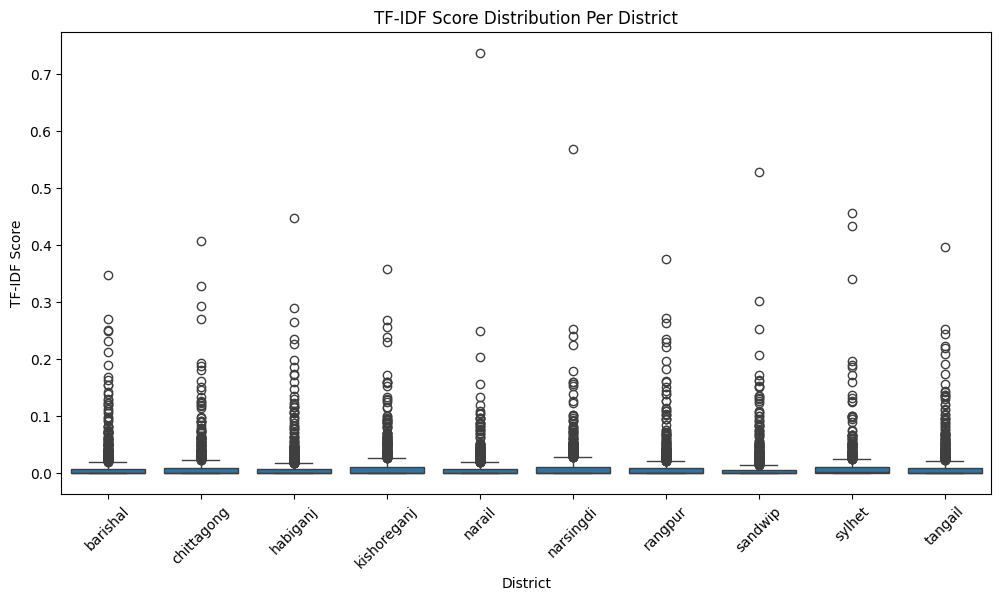

In [ ]:
# Melt the TF-IDF DataFrame for visualization
tfidf_melted = tfidf_df.melt(var_name="word", value_name="tfidf_score", ignore_index=False)
tfidf_melted.reset_index(inplace=True)
tfidf_melted.rename(columns={"index": "district"}, inplace=True)

# Plot Distribution of TF-IDF Scores per District
plt.figure(figsize=(12, 6))
sns.boxplot(data=tfidf_melted, x="district", y="tfidf_score")
plt.xticks(rotation=45)
plt.title("TF-IDF Score Distribution Per District")
plt.xlabel("District")
plt.ylabel("TF-IDF Score")
plt.show()

In [ ]:
def get_high_low_tfidf(tfidf_df, top_n=10):
    high_tfidf = {}
    low_tfidf = {}

    for district in tfidf_df.index:
        sorted_tfidf = tfidf_df.loc[district].sort_values(ascending=False)
        high_tfidf[district] = sorted_tfidf.head(top_n).index.tolist()
        low_tfidf[district] = sorted_tfidf.tail(top_n).index.tolist()

    return high_tfidf, low_tfidf


high_tfidf_words, low_tfidf_words = get_high_low_tfidf(tfidf_df)


for district in tfidf_df.index:
    print(f"\nDistrict Name: {district}")

    high_words_scores = tfidf_df.loc[district].sort_values(ascending=False).head(10)
    print("High TF-IDF Words:")
    for word, score in high_words_scores.items():
        print(f"  {word}: {score:.4f}")

    low_words_scores = tfidf_df.loc[district].sort_values(ascending=False).tail(10)
    print("\nLow TF-IDF Words:")
    for word, score in low_words_scores.items():
        print(f"  {word}: {score:.4f}")

    print("-" * 50)



District Name: barishal
High TF-IDF Words:
  ইয়: 0.3476
  কর: 0.2691
  ওয়: 0.2504
  এট: 0.2496
  আম: 0.2317
  কইরর: 0.2123
  এহন: 0.1885
  তয়: 0.1682
  আমন: 0.1633
  মন: 0.1532

Low TF-IDF Words:
  কফ: 0.0000
  কভ: 0.0000
  কমপ: 0.0000
  কমল: 0.0000
  করন: 0.0000
  করস: 0.0000
  কলক: 0.0000
  কলম: 0.0000
  কহন: 0.0000
  য়স: 0.0000
--------------------------------------------------

District Name: chittagong
High TF-IDF Words:
  ইয়: 0.4064
  ইত: 0.3278
  ফর: 0.2931
  গর: 0.2696
  ওড: 0.1927
  ইব: 0.1869
  তই: 0.1807
  আছ: 0.1617
  এন: 0.1510
  লই: 0.1446

Low TF-IDF Words:
  কপ: 0.0000
  কফ: 0.0000
  কব: 0.0000
  কভ: 0.0000
  কমত: 0.0000
  কমপ: 0.0000
  কমল: 0.0000
  করছ: 0.0000
  করত: 0.0000
  য়স: 0.0000
--------------------------------------------------

District Name: habiganj
High TF-IDF Words:
  আম: 0.4471
  ইত: 0.2893
  খর: 0.2646
  ওখন: 0.2343
  ওইল: 0.2268
  আছ: 0.1973
  এরফর: 0.1862
  ফর: 0.1734
  একট: 0.1710
  খরত: 0.1587

Low TF-IDF Words:
  কতখ: 0.0000
  কতট: 0.0000
  কতভ: 